<a href="https://colab.research.google.com/github/GayathriR12/Detection_Of_Child_Predators_In_SocialMedia/blob/main/Next_Runs_PlayerWise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the list of players and run the script to analyse the player's performance in the upcoming match.

Details:
Data from 2020 considered.
Runs scored from last 5 matches taken to predict the runs scored in the next match.
60-40% for train-test split.
Decision tree used for the prediction.

In [3]:
import pandas as pd

df = pd.read_csv('/content/battingCardPts.csv')

#pd.set_option("display.max_columns",100)
#df.head

In [4]:
#User prompt - Enter the list of players seperated by comma
players = list(map(str, input("Enter the list of players:").split(',')))
print("List of players: ", players)

#players = [
#    "Virat Kohli",
#    "Rohit Sharma",
#    "AB de Villiers",
#    "MS Dhoni",
#    "Ravindra Jadeja"
#]

Enter the list of players:Virat Kohli
List of players:  ['Virat Kohli']


In [5]:
df.rename(columns = {'fullName':'player'}, inplace = True)
df.shape

#df.info

(15720, 24)

In [6]:
#Create a array of list -
#Players - runs - strikeRate
Dict = {}

for i in players[0:]:
  Dict[i] = []

player:  Virat Kohli
(60, 24)
     season  match_id  match_name home_team away_team  \
30     2022   1304049  PBKS v RCB      PBKS       RCB   
83     2022   1304052   RCB v KKR       RCB       KKR   
205    2022   1304059    RR v RCB        RR       RCB   
275    2022   1304064    RCB v MI       RCB        MI   
335    2022   1304068   CSK v RCB       CSK       RCB   

                                             venue         city country  \
30         Dr DY Patil Sports Academy, Navi Mumbai  Navi Mumbai   India   
83         Dr DY Patil Sports Academy, Navi Mumbai  Navi Mumbai   India   
205                       Wankhede Stadium, Mumbai       Mumbai   India   
275  Maharashtra Cricket Association Stadium, Pune         Pune   India   
335        Dr DY Patil Sports Academy, Navi Mumbai  Navi Mumbai   India   

    current_innings  innings_id  ... minutes fours  sixes  strikeRate captain  \
30              RCB           1  ...      60   1.0    2.0      141.37       0   
83            

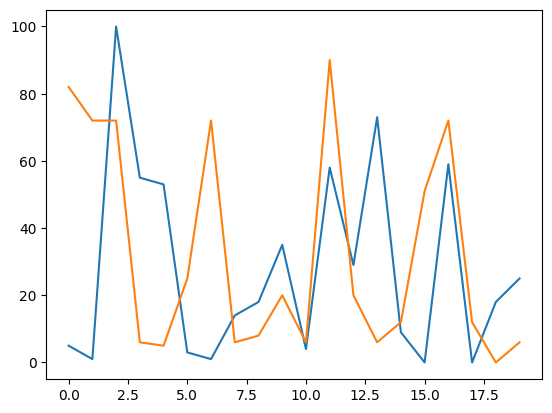

Player runs in the upcoming match:  [101.]
Analyse strikeRate:


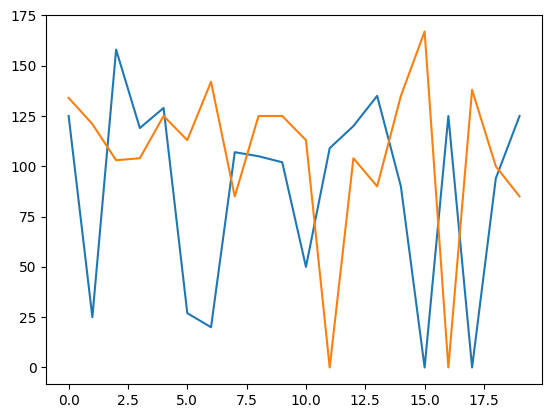

Player strikeRate in the upcoming match:  [165.]
{'Virat Kohli': [[array([58.]), array([142.])], [array([1.]), array([165.])], [array([101.]), array([165.])]]}


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

for i in players[0:]:
  runs_SR = []
  df_new = pd.DataFrame()

  #Create a new dataframe for each player
  df_new = df[df['player'] == i]
  print("player: ",i);

  #Consider seasons from 2020
  df_filtered = df_new[(df_new['season'] >= 2020)]
  df_new = df_filtered

  #Sort the matches based on date
  df_new.sort_values(by=['match_id'])

  print(df_new.shape)
  print(df_new.head())

  #For each record with runs scored on that day, find the runs scored in the last 4 matches; and the runs scored in the next match
  df_new['next_runs'] = df_new['runs'].shift(-1)
  df_new['runs_minusFour'] = df_new['runs'].shift(+4)
  df_new['runs_minusThree'] = df_new['runs'].shift(+3)
  df_new['runs_minusTwo'] = df_new['runs'].shift(+2)
  df_new['runs_minusOne'] = df_new['runs'].shift(+1)

  #For each record with runs scored on that day, find the strikerate in the last 4 matches; and the strikerate in the next match
  df_new['next_strikeRate'] = df_new['strikeRate'].shift(-1)
  df_new['strikeRate_minusFour'] = df_new['strikeRate'].shift(+4)
  df_new['strikeRate_minusThree'] = df_new['strikeRate'].shift(+3)
  df_new['strikeRate_minusTwo'] = df_new['strikeRate'].shift(+2)
  df_new['strikeRate_minusOne'] = df_new['strikeRate'].shift(+1)

  #Final input test - the last record
  df_input = df_new.tail(1)
  print(df_input)

  #Remove nulls
  df_new.isnull().sum()
  df_new.dropna(inplace = True)

  #----Runs-----
  #Feature set consists of runs scored in the last 5 matches to predict the runs scored in the next match
  features = ['runs_minusFour','runs_minusThree','runs_minusTwo','runs_minusOne','runs']
  targetVariable = 'next_runs'

  X = df_new[features]
  y = df_new[targetVariable].values
  y = y.astype('int')

  #Train test split
  train_ip, test_ip, train_op, test_op = train_test_split(X,y,
                                    random_state=42,
                                    train_size=0.60,
                                    test_size=0.40, #reduce from consider 0.3333
                                    shuffle=True)

  #Training & Testing
  DT_regressor = DecisionTreeRegressor()
  DT_regressor.fit(train_ip, train_op)
  y_pred_DT = DT_regressor.predict(test_ip)

  #PLOT
  print("Analyse Runs:")
  test_op = pd.DataFrame(test_op)
  y_pred = pd.DataFrame(y_pred_DT)

  plt.plot(test_op.index,test_op)
  plt.plot(y_pred.index,y_pred)

  plt.show()

  #Check for a random input
  pred_runs = DT_regressor.predict(df_input[features])
  print("Player runs in the upcoming match: ",pred_runs)

  #----strikeRate-----
  #Feature set consists of runs scored in the last 5 matches to predict the runs scored in the next match
  features_SR = ['strikeRate_minusFour','strikeRate_minusThree','strikeRate_minusTwo','strikeRate_minusOne','strikeRate']
  targetVariable_SR = 'next_strikeRate'

  X = df_new[features_SR]
  y = df_new[targetVariable_SR].values
  y = y.astype('int')

  #Train test split
  train_ip, test_ip, train_op, test_op = train_test_split(X,y,
                                    random_state=42,
                                    test_size=0.40, #reduce from consider 0.3333
                                    shuffle=True)

  #Training & Testing
  DT_regressor = DecisionTreeRegressor()
  DT_regressor.fit(train_ip, train_op)
  y_pred_DT = DT_regressor.predict(test_ip)

  #PLOT
  print("Analyse strikeRate:")
  test_op = pd.DataFrame(test_op)
  y_pred = pd.DataFrame(y_pred_DT)

  plt.plot(test_op.index,test_op)
  plt.plot(y_pred.index,y_pred)

  plt.show()

  #Check for a random input
  pred_strikeRate = DT_regressor.predict(df_input[features_SR])
  print("Player strikeRate in the upcoming match: ",pred_strikeRate)

  #Array of predicted runs-strikeRate
  runs_SR.append(pred_runs)
  runs_SR.append(pred_strikeRate)

  Dict[i].append(runs_SR)

print(Dict)

In [ ]:
#RF_regressor = RandomForestRegressor(n_estimators=100,random_state=123) - RF for prediction

#venue = 'M.Chinnaswamy Stadium, Bengaluru'

#Filter based on venue
  #df_filtered = df_new[(df_new['season'] >= 2020) & (df_new['venue'] == venue)]

#  print("test score:",r2_score(test_op,y_pred_DT) )
#  print("train score: ",DT_regressor.score(train_ip, train_op))

In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

for i in players[0:]:
  df_new = pd.DataFrame()

  #Create a new dataframe for each player
  df_new = df[df['player'] == i]
  print("player: ",i);

  #Consider seasons from 2020
  df_filtered = df_new[(df_new['season'] >= 2020)]
  df_new = df_filtered

  #Sort the matches based on date
  df_new.sort_values(by=['match_id'])

  #For each record with runs scored on that day, find the runs scored in the last 4 matches; and the runs scored in the next match
  df_new['next_runs'] = df_new['runs'].shift(-1)
  df_new['runs_minusFour'] = df_new['runs'].shift(+4)
  df_new['runs_minusThree'] = df_new['runs'].shift(+3)
  df_new['runs_minusTwo'] = df_new['runs'].shift(+2)
  df_new['runs_minusOne'] = df_new['runs'].shift(+1)

  #Final input test - the last record
  df_input = df_new.tail(1)
  print(df_input)

  #Remove nulls
  df_new.isnull().sum()
  df_new.dropna(inplace = True)

  #Feature set consists of runs scored in the last 5 matches to predict the runs scored in the next match
  features = ['runs_minusFour','runs_minusThree','runs_minusTwo','runs_minusOne','runs']
  targetVariable = 'next_runs'

  X = df_new[features]
  y = df_new[targetVariable].values
  y = y.astype('int')

  #Train test split
  train_ip, test_ip, train_op, test_op = train_test_split(X,y,
                                    random_state=8,
                                    test_size=0.40, #reduce from consider 0.3333
                                    shuffle=True)


  #Training & Testing
  scoring = make_scorer(r2_score)
  DT_regressor = GridSearchCV(DecisionTreeRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
  DT_regressor.fit(train_ip, train_op)
  y_pred_DT = DT_regressor.predict(test_ip)

  #PLOT
  test_op = pd.DataFrame(test_op)
  y_pred = pd.DataFrame(y_pred_DT)

  plt.plot(test_op.index,test_op)
  plt.plot(y_pred.index,y_pred)

  plt.show()

  #Check for a random input
  pred_input = DT_regressor.predict(df_input[features])
  print("Player runs in the upcoming match: ",pred_input)

  '''

In [ ]:
'''
##Train val split
  train_ip, val_ip, train_op, val_op = train_test_split(train_ip,train_op,
                                    random_state=8,
                                    test_size=0.20,
                                    shuffle=True)

'''

In [ ]:
'''
Dict = {0:[],1:[],2:[]}

players = [0,1,2]

for i in players[0:]:
  runs_SR = [101,5]
  #Dict[i]=runs_SR
  Dict[i].append(runs_SR)

print(Dict)

for i in players[0:]:
  runs_SR = [40,50.60]
  #Dict[i]=runs_SR
  Dict[i].append(runs_SR)

print(Dict)
'''